# Visualise Embeddings 
Visualise sequences embedded using the Bacillus Protvec model, the Swissprot Protvec model and kmer frequency 

In [1]:
#imports 
import pandas as pd
from collections import Counter
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib import rc
from sklearn.decomposition import PCA
import numpy as np

In [9]:
#import the sequences embedded with the bacillus carbohydrate metabolism trained model
embedding_bacil = pd.read_csv('../scripts/bacillus_carbohydratemetabolism_embedded.tsv', sep = '\t')
embedding_s_bacil = embedding_bacil.dropna()
seqs_keys_bacil = embedding_bacil['Unnamed: 0']
seqs_s_keys_bacil = embedding_s_bacil['Unnamed: 0']

#read in the sequences embedded with swissprot 
embedding_swissprot_bacil = pd.read_csv('../scripts//bacillus_carbohydratemetabolism_swissprotembedded.tsv', sep = '\t')
embedding_swissprot_s_bacil= embedding_swissprot_bacil.dropna()
seqs_swiss_keys_bacil = embedding_swissprot_s_bacil['Unnamed: 0']

#read in the sequences embedded using kmer frequency 
embed_kmerfreqDf = pd.read_csv('../scripts/kmer_frequency_bacillus.csv')
embed_kmerfreq = embed_kmerfreqDf.drop('Unnamed: 0', axis = 1)
embed_seqs_keys = pd.read_csv('md5_subclass_kmerfreq.csv', sep = '\t')

In [10]:
#get the subsystems labels for bacillus 
sub_sys_bacil = pd.read_csv('../data/bacillus.ids.tsv', sep = '\t', header = None)
sub_sys_bacil.columns =  ['fig_ID', 'species', 'superclass', 'class', 'subclass', 'subsystem', 'product role_name']

#get the file which takes the md5 hashes to the fig IDs 
md5_fig_bacil = pd.read_csv('../data/bacillus.md5.ids', sep = '\t', header = None)
md5_fig_bacil.columns = ['md5', 'fig_ID']

#assemble as a dictionary which takes a seqence key to the ontological represenation 
seqs_keys_figID_bacil = pd.concat([md5_fig_bacil[md5_fig_bacil['md5'] == key] for key in seqs_s_keys_bacil])
seqs_keys_figID_swiss_bacil = pd.concat([md5_fig_bacil[md5_fig_bacil['md5'] == key] for key in seqs_swiss_keys_bacil])

## Group by Subsystem and Subclass 

In [11]:
#make dictionaries for subclass/superclass but this time include the entry 'dual'
fig2subclass_bacil = sub_sys_bacil[['fig_ID', 'subclass']].drop_duplicates()
fig2subsystem_bacil = sub_sys_bacil[['fig_ID', 'subsystem']].drop_duplicates()

#change fig_IDs which have more than one subclass to 'dual'
duplicate_subclasses_bacil = pd.DataFrame(fig2subclass_bacil['fig_ID'].value_counts())
duplicate_subclasses_bacil = duplicate_subclasses_bacil[duplicate_subclasses_bacil['fig_ID'] > 1].index.values
duplicate_removed_subclasses_bacil = fig2subclass_bacil[~fig2subclass_bacil['fig_ID'].isin(duplicate_subclasses_bacil)]

dual_vec = ['dual' for i in range(0,len(duplicate_subclasses_bacil))]
dual_subclasses_bacil = pd.DataFrame({'fig_ID': duplicate_subclasses_bacil, 'subclass': dual_vec})
fig2subclass_bacil = pd.concat([duplicate_removed_subclasses_bacil, dual_subclasses_bacil], axis = 0)

#change fig_IDs which have more than one subsystem to 'dual'
duplicate_subsystems_bacil = pd.DataFrame(fig2subsystem_bacil['fig_ID'].value_counts())
duplicate_subsystems_bacil = duplicate_subsystems_bacil[duplicate_subsystems_bacil['fig_ID'] > 1].index.values
duplicate_removed_subsystems_bacil = fig2subsystem_bacil[~fig2subsystem_bacil['fig_ID'].isin(duplicate_subsystems_bacil)]

dual_vec = ['dual' for i in range(0,len(duplicate_subsystems_bacil))]
dual_subsystems_bacil = pd.DataFrame({'fig_ID': duplicate_subsystems_bacil, 'subsystem': dual_vec})
fig2subsystem_bacil = pd.concat([duplicate_removed_subsystems_bacil, dual_subsystems_bacil], axis = 0)

#make these dataframes into dictionaries 
subclass_dict_bacil = dict(zip(fig2subclass_bacil['fig_ID'].values, fig2subclass_bacil['subclass'].values))
subsystem_dict_bacil = dict(zip(fig2subsystem_bacil['fig_ID'].values, fig2subsystem_bacil['subsystem'].values))

#add columns to dataframes for the subsystem and subclasses 
seqs_keys_figID_bacil['Subsystem'] = [subsystem_dict_bacil.get(fig_id) for fig_id in seqs_keys_figID_bacil['fig_ID']]
seqs_keys_figID_bacil['Subclass'] = [subclass_dict_bacil.get(fig_id) for fig_id in seqs_keys_figID_bacil['fig_ID']]

#collapse by _sysclass and subsystem 
seqs_subclass_bacil = seqs_keys_figID_bacil[['md5', 'Subclass']].drop_duplicates()
seqs_subsystem_bacil = seqs_keys_figID_bacil[['md5', 'Subsystem']].drop_duplicates()


In [13]:
#add columns to dataframes for the subsystem and subclasses 
seqs_keys_figID_swiss_bacil['Subsystem'] = [subsystem_dict_bacil.get(fig_id) for fig_id in seqs_keys_figID_swiss_bacil['fig_ID']]
seqs_keys_figID_swiss_bacil['Subclass'] = [subclass_dict_bacil.get(fig_id) for fig_id in seqs_keys_figID_swiss_bacil['fig_ID']]

#collapse by _sysclass and subsystem 
seqs_subclass_swiss_bacil = seqs_keys_figID_swiss_bacil[['md5', 'Subclass']].drop_duplicates()
seqs_subsystem_swiss_bacil = seqs_keys_figID_swiss_bacil[['md5', 'Subsystem']].drop_duplicates()

In [15]:
#make dictionaries for subclass/superclass but this time include the entry 'dual'
fig2subclass_bacil = sub_sys_bacil[['fig_ID', 'subclass']].drop_duplicates()
fig2subsystem_bacil = sub_sys_bacil[['fig_ID', 'subsystem']].drop_duplicates()

#change fig_IDs which have more than one subclass to 'dual'
duplicate_subclasses_bacil = pd.DataFrame(fig2subclass_bacil['fig_ID'].value_counts())
duplicate_subclasses_bacil = duplicate_subclasses_bacil[duplicate_subclasses_bacil['fig_ID'] > 1].index.values
duplicate_removed_subclasses_bacil = fig2subclass_bacil[~fig2subclass_bacil['fig_ID'].isin(duplicate_subclasses_bacil)]

dual_vec = ['dual' for i in range(0,len(duplicate_subclasses_bacil))]
dual_subclasses_bacil = pd.DataFrame({'fig_ID': duplicate_subclasses_bacil, 'subclass': dual_vec})
fig2subclass_bacil = pd.concat([duplicate_removed_subclasses_bacil, dual_subclasses_bacil], axis = 0)

#change fig_IDs which have more than one subsystem to 'dual'
duplicate_subsystems_bacil = pd.DataFrame(fig2subsystem_bacil['fig_ID'].value_counts())
duplicate_subsystems_bacil = duplicate_subsystems_bacil[duplicate_subsystems_bacil['fig_ID'] > 1].index.values
duplicate_removed_subsystems_bacil = fig2subsystem_bacil[~fig2subsystem_bacil['fig_ID'].isin(duplicate_subsystems_bacil)]

dual_vec = ['dual' for i in range(0,len(duplicate_subsystems_bacil))]
dual_subsystems_bacil = pd.DataFrame({'fig_ID': duplicate_subsystems_bacil, 'subsystem': dual_vec})
fig2subsystem_bacil = pd.concat([duplicate_removed_subsystems_bacil, dual_subsystems_bacil], axis = 0)

#make these dataframes into dictionaries 
subclass_dict_bacil = dict(zip(fig2subclass_bacil['fig_ID'].values, fig2subclass_bacil['subclass'].values))
subsystem_dict_bacil = dict(zip(fig2subsystem_bacil['fig_ID'].values, fig2subsystem_bacil['subsystem'].values))

#add columns to dataframes for the subsystem and subclasses 
seqs_keys_figID_bacil['Subsystem'] = [subsystem_dict_bacil.get(fig_id) for fig_id in seqs_keys_figID_bacil['fig_ID']]
seqs_keys_figID_bacil['Subclass'] = [subclass_dict_bacil.get(fig_id) for fig_id in seqs_keys_figID_bacil['fig_ID']]

#collapse by subclass and subsystem 
seqs_subclass_bacil = seqs_keys_figID_bacil[['md5', 'Subclass']].drop_duplicates()
seqs_subsystem_bacil = seqs_keys_figID_bacil[['md5', 'Subsystem']].drop_duplicates()

In [18]:
seqs_subsystem_count = Counter(seqs_subsystem_bacil['md5'].values)
count_df = pd.DataFrame.from_dict(seqs_subsystem_count, orient='index').reset_index()
duplicates = count_df[count_df[0]>1] #this gives the 2 sequences with duplicates
duplicates_md5 = duplicates['index'].values
duplicates_df = seqs_subsystem_bacil[seqs_subsystem_bacil['md5'].isin(duplicates_md5)]
duplicates_idx = duplicates_df[duplicates_df['Subsystem'] != 'dual'].index.values
seqs_subsystem_bacil= seqs_subsystem_bacil.drop(duplicates_idx)

#replace the dual labels 
seqs_subclass_bacil = seqs_subclass_bacil.replace('dual', 'CO2 fixation and C-1 compound metabolism')
seqs_subclass_swiss_bacil = seqs_subclass_swiss_bacil.replace('dual', 'CO2 fixation and C-1 compound metabolism')

#set the colourmap for the plots
cmap = ('#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a' ) #colour map for the plots 
cmap2 = ('#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd')
tol_muted = ('#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
                    '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD',
                    '#000000')

## Visualise the sequences embedded with the Bacillus Protvec model 

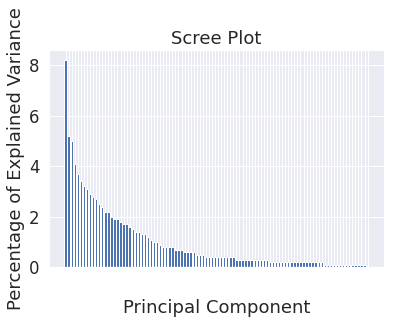

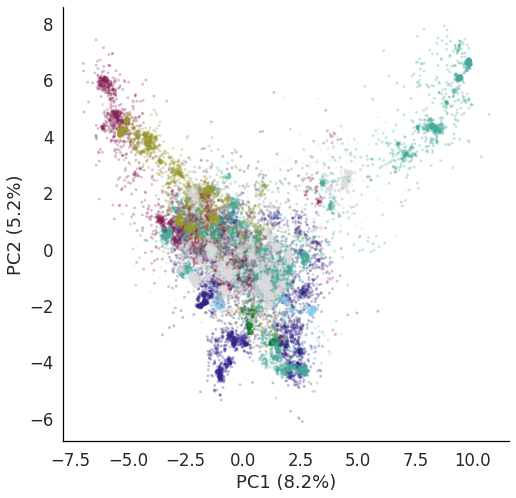

In [60]:
#do the PCA 
embedding_scaled = StandardScaler().fit_transform(embedding_s_bacil.drop(['Unnamed: 0'], axis = 1).values)

pca = PCA()
embedding_pca = pca.fit_transform(embedding_scaled)

#do the scree plot - see how the PCA went 
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.xticks(color='w')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


#plot the PCA 
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
pca_df = pd.DataFrame(embedding_pca, columns=labels).set_index(seqs_s_keys_bacil)
pca_df['Subclass'] = seqs_subclass_bacil['Subclass'].values

#sort the pca df by the subclass labels - allows to keep colours consistent between models 
pca_df_bacil = pca_df.sort_values('Subclass')

#get the labels for the plot 
x_label_bacil= 'PC1 ('+str(np.round(per_var[0],2))+"%)"
y_label_bacil = 'PC2 ('+str(np.round(per_var[1],2))+"%)"

sns.set(font_scale = 1.5)
fig, ax = plt.subplots(1, 1, figsize = (8,8))
ax.set_facecolor('white')
plt.xlabel(x_label_bacil, fontsize = 18)
plt.ylabel(y_label_bacil, fontsize = 18)
pca_df_bacil = pca_df_bacil.sort_values('Subclass')
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Subclass',data = pca_df_bacil, legend = 'full', s = 8,linewidth=0, alpha = 0.3, palette = tol_muted)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.legend([],[], frameon=False)

## Visualise the sequences embedded with the Swissprot Protvec model 

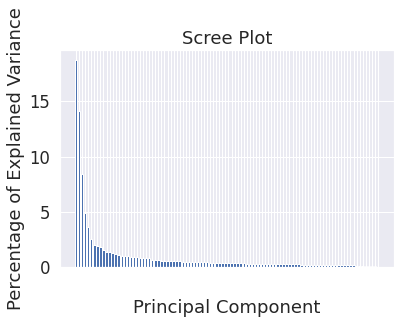

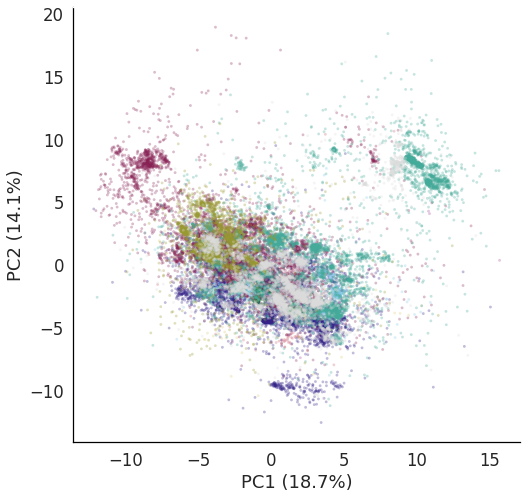

In [61]:
#do the PCA 
embedding_scaled = StandardScaler().fit_transform(embedding_swissprot_s_bacil.drop(['Unnamed: 0'], axis = 1).values)

pca = PCA()
embedding_pca = pca.fit_transform(embedding_scaled)

#do the scree plot - see how the PCA went 
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.xticks(color='w')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

#plot the PCA 
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
pca_df = pd.DataFrame(embedding_pca, columns=labels).set_index(seqs_swiss_keys_bacil)
pca_df['Subclass'] = seqs_subclass_swiss_bacil['Subclass'].values


#sort the pca df by the subclass labels - allows to keep colours consistent between models 
pca_df_swissprot = pca_df.sort_values('Subclass')

#get the labels for the plot 
x_label_swissprot = 'PC1 ('+str(np.round(per_var[0],2))+"%)"
y_label_swissprot = 'PC2 ('+str(np.round(per_var[1],2))+"%)"

sns.set(font_scale = 1.5)
fig, ax = plt.subplots(1, 1, figsize = (8,8))
ax.set_facecolor('white')
plt.xlabel(x_label_swissprot, fontsize = 18)
plt.ylabel(y_label_swissprot, fontsize = 18)
pca_df_swissprot = pca_df_swissprot.sort_values('Subclass')
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Subclass',data = pca_df_swissprot, legend = 'full', s = 8,linewidth=0, alpha = 0.3, palette = tol_muted)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.legend([],[], frameon=False)

## Visualise the sequences embedded with k-mer frequency Protvec model 

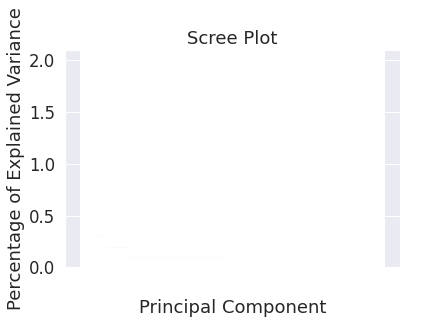

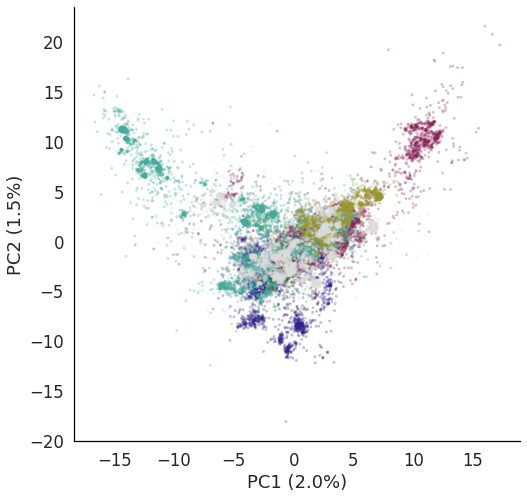

In [62]:
#do the PCA 
embedding_scaled = StandardScaler().fit_transform(embed_kmerfreq)

pca = PCA()
embedding_pca = pca.fit_transform(embedding_scaled)

#do the scree plot - see how the PCA went 
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.xticks(color='w')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

#plot the PCA 
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
pca_df = pd.DataFrame(embedding_pca, columns=labels)
pca_df.index = embed_seqs_keys['md5']
pca_df['Subclass'] = embed_seqs_keys['Subclass'].values

#sort the pca df by the subclass labels - allows to keep colours consistent between models 
pca_df_kmerfreq = pca_df.sort_values('Subclass')

#get the labels for the plot 
x_label_kfreq = 'PC1 ('+str(np.round(per_var[0],2))+"%)"
y_label_kfreq = 'PC2 ('+str(np.round(per_var[1],2))+"%)"

sns.set(font_scale = 1.5)
fig, ax = plt.subplots(1, 1, figsize = (8,8))
ax.set_facecolor('white')
plt.xlabel(x_label_kfreq, fontsize = 18)
plt.ylabel(y_label_kfreq, fontsize = 18)
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Subclass',data = pca_df_kmerfreq, legend = 'full', s = 8,linewidth=0, alpha = 0.3, palette = tol_muted)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.legend([],[], frameon=False)

very little explained variance in the k-mer frequency PCA plot

## Combine into the same plot 

Text(0.5, 1.04, 'K-mer frequency')

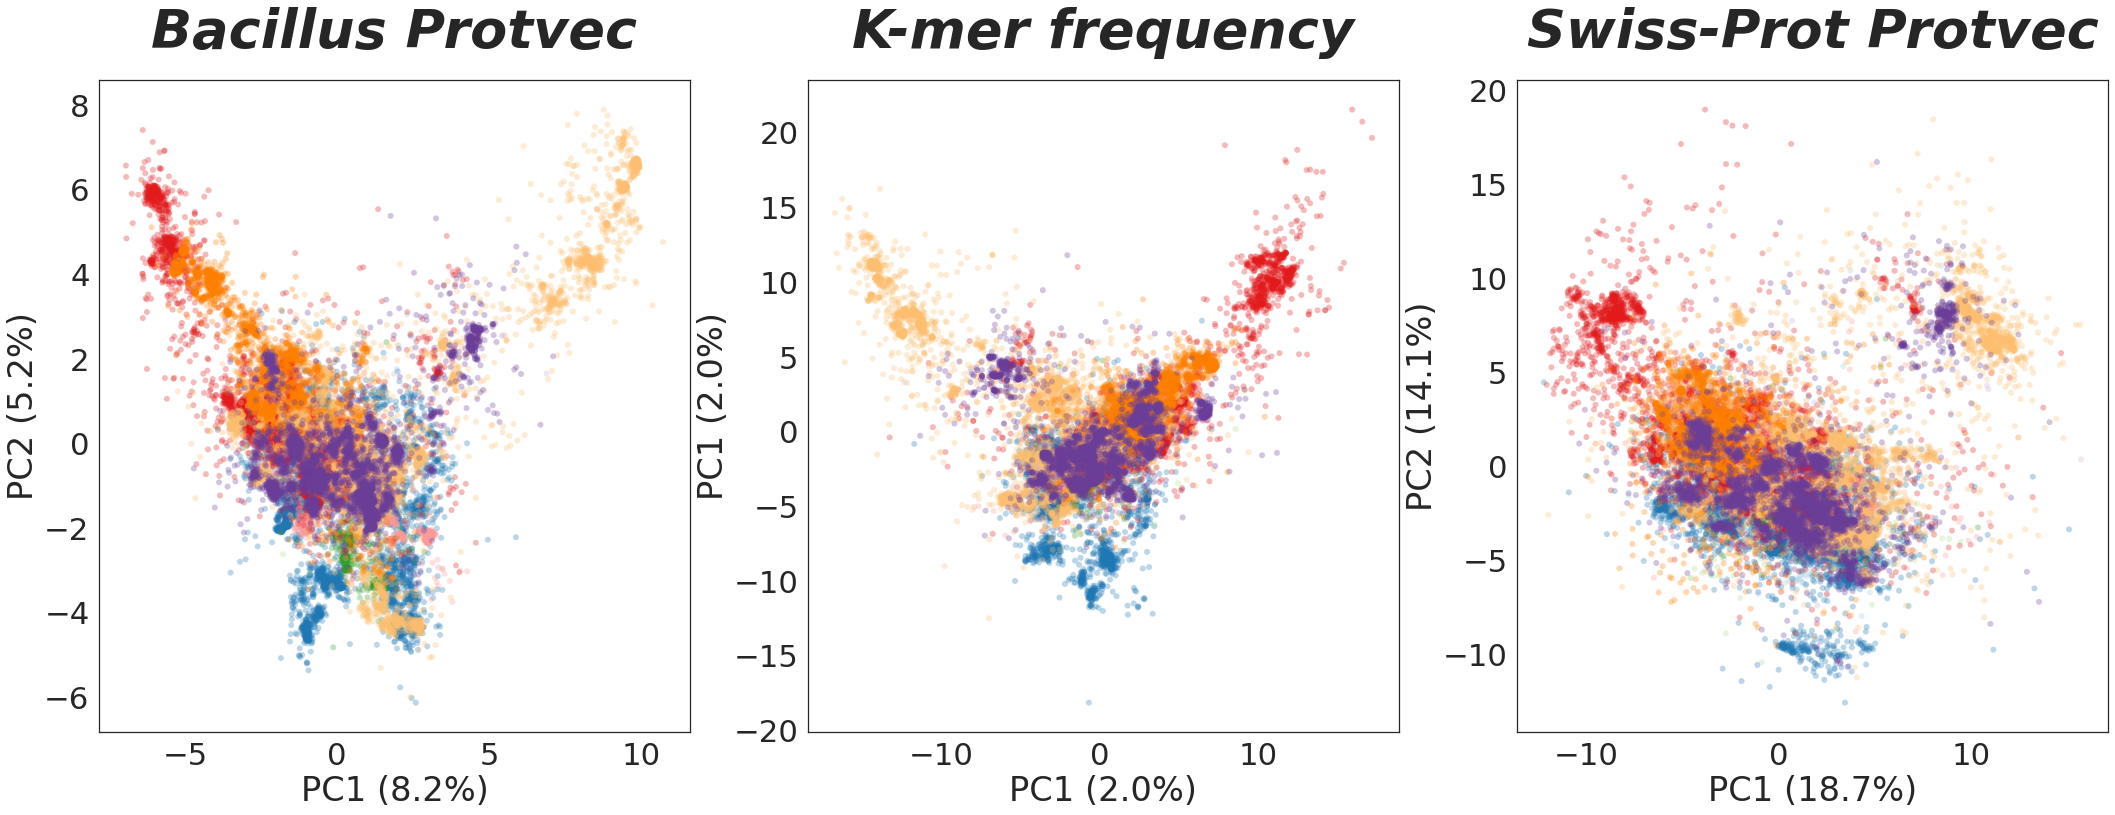

In [63]:
sns.set(font_scale = 2.8, style = 'white')
fig, axes = plt.subplots(1,3 ,sharex=False, figsize=(36,12))

sns.scatterplot(ax = axes[0],x = 'PC1', y = 'PC2', hue = 'Subclass',data = pca_df_bacil, s = 36,linewidth=0, alpha = 0.3, palette = cmap,  legend = False)

sns.scatterplot(ax = axes[1],x = 'PC1', y = 'PC2', hue = 'Subclass',data = pca_df_kmerfreq, s = 36,linewidth=0, alpha = 0.3, palette = cmap,  legend = False)

sns.scatterplot(ax = axes[2],x = 'PC1', y = 'PC2', hue = 'Subclass',data = pca_df_swissprot, s = 36,linewidth=0, alpha = 0.3, palette = cmap,  legend = False)

axes[0].set(xlabel=x_label_bacil, ylabel= y_label_bacil)
axes[1].set(xlabel=x_label_kfreq, ylabel= x_label_kfreq)
axes[2].set(xlabel=x_label_swissprot, ylabel= y_label_swissprot)

axes[0].set_title("Bacillus Protvec",  weight='bold', fontsize = 54, fontstyle='italic',  y=1.04)
axes[2].set_title("Swiss-Prot Protvec",  fontsize = 54, weight='bold', fontstyle='italic',  y=1.04)
axes[1].set_title("K-mer frequency", fontsize = 54, weight = 'bold', fontstyle='italic',  y=1.04)